### Registration ID : GO_STP_9654

K-Nearest Neighbor(KNN) Machine Learning Usecase
Check users who are interested in buying SUV Car or not.

We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car
or not.

import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sns
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("User_Data.csv")
type(df)

pandas.core.frame.DataFrame

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

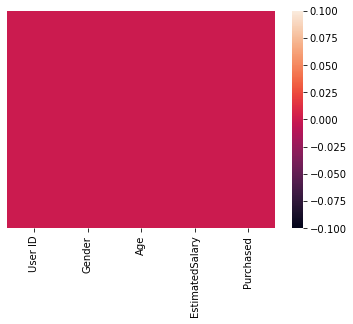

In [8]:
sb.heatmap(df.isnull(), yticklabels=False) # check null values with the help of heatmap

In [9]:
df.index

RangeIndex(start=0, stop=400, step=1)

In [10]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
# label encoder just converting string to numerical for column which has string data type
df.Gender = le.fit_transform(df.Gender)

In [16]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


### Classify Features and Targets

In [17]:
x = df.iloc[:,1:4]
print(x.ndim)
print(x.shape)
print(x.head(2))

2
(400, 3)
   Gender  Age  EstimatedSalary
0       1   19            19000
1       1   35            20000


In [18]:
y = df.iloc[:,4]
print(y.ndim)
print(y.shape)
print(y.head(2))

1
(400,)
0    0
1    0
Name: Purchased, dtype: int64


In [19]:
# splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [20]:
# create KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

In [21]:
# Training of the Model by providing training data
Mymodel = knn.fit(xtrain,ytrain)

In [22]:
# Prediction
y_pred = Mymodel.predict(xtest)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

### Confusion Matrix and Accuracy Score

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix is:\n", cm)

Confusion Matrix is:
 [[61 11]
 [23 25]]


In [24]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))

Accuracy of model: 71.66666666666667%


### Data Visualization

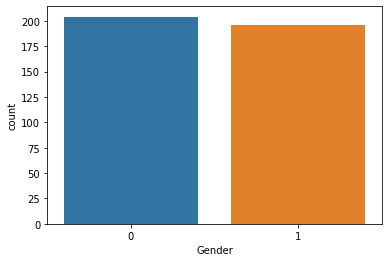

In [25]:
sb.countplot(x = "Gender", data = df);

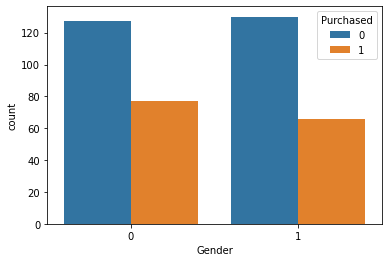

In [26]:
sb.countplot(x = "Gender", hue = "Purchased", data = df);

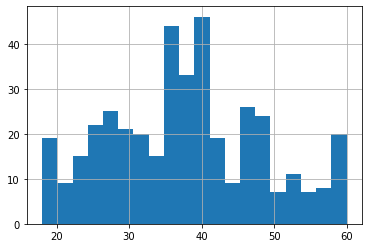

In [27]:
plt.grid()
plt.hist(x = df["Age"], bins = 20);

<AxesSubplot:ylabel='Frequency'>

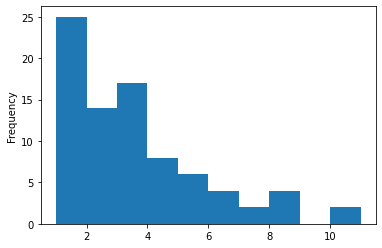

In [28]:
purch_0 = df[df["Purchased"] == 0].groupby(["EstimatedSalary"]).count()
purch_0["Purchased"].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

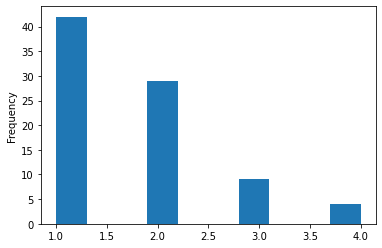

In [29]:
purch_1 = df[df["Purchased"] == 1].groupby(["EstimatedSalary"]).count()
purch_1["Purchased"].plot(kind = "hist")

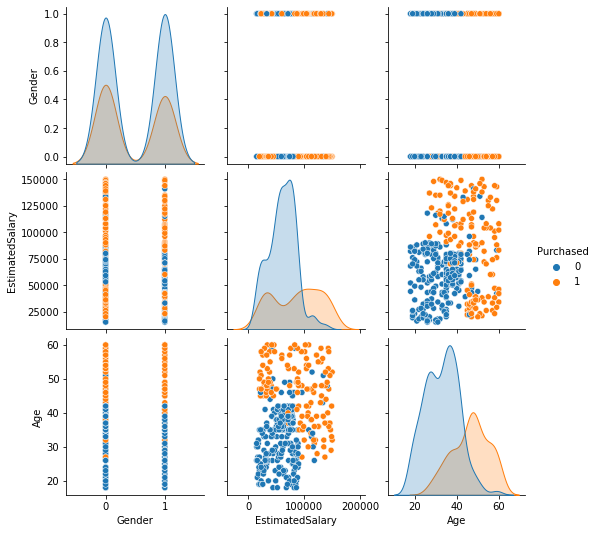

In [30]:
sb.pairplot(data = df, hue = "Purchased", vars = ["Gender", "EstimatedSalary", "Age"]);